In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.optimize

import matplotlib.pyplot as plt

from joblib import Parallel, delayed, cpu_count
import pickle

#Import the driver and helper functions from src
from src.tfim_st import * 
from src.helpers import *

<h3> 1D TFIM </h3>

(lx,ly) = (1,8)
kappa:  0.9
$\alpha_c = 18.0$
$f_c = 15$
Mean ZZ = 0.4185152589942334




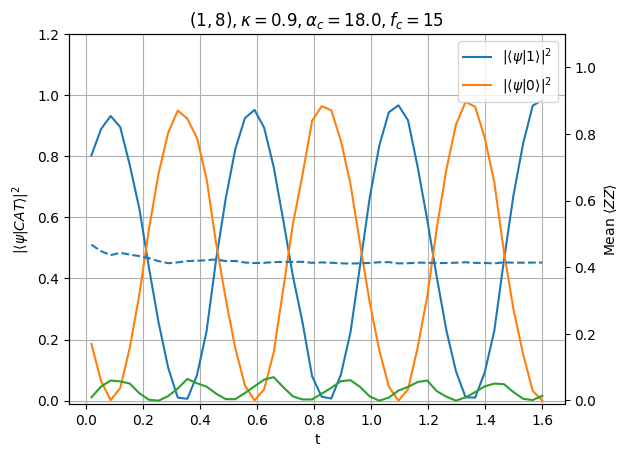

In [2]:
#set the geometric parameters
lx = 1
ly_min = 8 
ly_max = 8
lattice_array = [(lx,ly) for ly in range(ly_min,ly_max+1)]#{(lx,y) | y \in [ly_min, ly_max]} 

#transverse field strength
kappa_vals = [0.9]

#AC drive parameters
alpha_coef_vals=[18.]  #alpha = alpha_coef* log(N)/log(8)
freq_coef = 15 #freq = freq_coef*log


num_parallel_jobs = cpu_count()
num_steps = 48 
dt_coef = 0.05 #dt = dt_coef/frequency 
ramptime_divisor = 4 #ramptime = N/ramptime_divisor

sim_time_coef = 0.8 #variable to determine how hoe long our difference between simulation lengths is, namely sim_time_coef/frequency

num_samples = 1000

param_arr = generate_params(steps = num_steps, 
                            kappa_vals=kappa_vals, 
                            lattice_arr=lattice_array, 
                            alpha_coef_vals = alpha_coef_vals, 
                            freq_coef=freq_coef,
                            dt_coef=dt_coef,
                            ramptime_divisor=ramptime_divisor,
                            sim_time_coef=sim_time_coef,
                            num_samples = num_samples) #construct an array of dicts for the simulations

path_to_data_directory = "data/"
filename_prefix = "tfim_st"

while len(param_arr) > 0:
    param_evolution = [] #this is the array that stores each of the 48 evolutions
    
    for j in range(num_steps): #gets the subarray of the parameters for each simulation trajectory of varying plateau time
        param_evolution.append(param_arr.pop(0))
    
    kappa = param_evolution[0]['kappa']
    alpha_coef = param_evolution[0]['alpha_coef'] 
    freq_coef = param_evolution[0]['freq_coef']
    lx = param_evolution[0]['lx']
    ly = param_evolution[0]['ly']
   
    data = Parallel(n_jobs=num_parallel_jobs)(delayed(TFIM_evolve_2d_continous_sampling)(**param) for param in param_evolution)

    #convert the data dict to a dataframe
    df = pd.DataFrame(data)

    print("(lx,ly) = ({},{})".format(lx,ly))
    print("kappa: ", kappa)
    print(r"$\alpha_c = {}$".format(alpha_coef))
    print(r"$f_c = {}$".format(freq_coef))



    heating= np.ones(len(df.ones_overlap))
    heating -= (df.ones_overlap + df.zeros_overlap)

    fig1, ax1 = plt.subplots()

    ax2 = ax1.twinx() 
    ax1.grid(True)
    
    ax1.plot(df.plateau_time, df.ones_overlap, label = r"$|\langle \psi | 1 \rangle|^2$" )
    ax1.plot(df.plateau_time, df.zeros_overlap, label = r"$|\langle \psi | 0 \rangle|^2$")
    ax2.plot(df.plateau_time, df.ZZ_mean, "--", label = r"$\langle ZZ \rangle$" )

        
    ax1.plot(df.plateau_time, heating)


    ax1.set_title(r'$({},{}), \kappa = {}, \alpha_c = {}, f_c = {}$'.format(lx,ly, kappa,alpha_coef, freq_coef))
    ax1.set_ylabel(r"$|\langle \psi | CAT \rangle|^2$")
    ax1.set_xlabel(r"t")
    ax2.set_ylabel(r"Mean $\langle ZZ \rangle$")
    ax1.set_ylim(-0.01, 1.2)
    ax2.set_ylim(-0.01,1.1)


    ax1.legend(loc="upper right")
    
    
    print("Mean ZZ = {}\n\n".format( np.mean(df.ZZ_mean)))


    #store the data
    filename = generate_filename(filename_prefix, param_evolution[0])
    data_file_path = path_to_data_directory + filename
    with open(data_file_path, 'wb') as pickle_file:
        pickle.dump(df, pickle_file)


<h3>2D TFIM (2,y)</h3>

In [ ]:
#set the geometric parameters
lx = 2
ly_min = 6
ly_max = 6
lattice_array = [(lx,ly) for ly in range(ly_min,ly_max+1)]#{(lx,y) | y \in [ly_min, ly_max]} 

#transverse field strength
kappa_vals = [1.75]

#AC drive parameters
alpha_coef_vals=[1.,5.,18.] #alpha = alpha_coef* log(N)/log(8)
freq_coef = 15 #freq = freq_coef*log


num_parallel_jobs = cpu_count()
num_steps = 48 
dt_coef = 0.05 #dt = dt_coef/frequency 
ramptime_divisor = 4 #ramptime = N/ramptime_divisor

sim_time_coef = 0.8 #variable to determine how hoe long our difference between simulation lengths is, namely sim_time_coef/frequency

num_samples = 1000

param_arr = generate_params(steps = num_steps, 
                            kappa_vals=kappa_vals, 
                            lattice_arr=lattice_array, 
                            alpha_coef_vals = alpha_coef_vals, 
                            freq_coef=freq_coef,
                            dt_coef=dt_coef,
                            ramptime_divisor=ramptime_divisor,
                            sim_time_coef=sim_time_coef,
                            num_samples = num_samples) #construct an array of dicts for the simulations

path_to_data_directory = "data/"
filename_prefix = "tfim_st"

while len(param_arr) > 0:
    param_evolution = [] #this is the array that stores each of the 48 evolutions
    
    for j in range(num_steps):
        param_evolution.append(param_arr.pop(0))
    
    kappa = param_evolution[0]['kappa']
    alpha_coef = param_evolution[0]['alpha_coef'] 
    freq_coef = param_evolution[0]['freq_coef']
    lx = param_evolution[0]['lx']
    ly = param_evolution[0]['ly']
   
    data = Parallel(n_jobs=num_parallel_jobs)(delayed(TFIM_evolve_2d_continous_sampling)(**param) for param in param_evolution)

    #convert the data dict to a dataframe
    df = pd.DataFrame(data)

    print("(lx,ly) = ({},{})".format(lx,ly))
    print("kappa: ", kappa)
    print(r"$\alpha_c = {}$".format(alpha_coef))
    print(r"$f_c = {}$".format(freq_coef))



    heating= np.ones(len(df.ones_overlap))
    heating -= (df.ones_overlap + df.zeros_overlap)

    fig1, ax1 = plt.subplots()

    ax2 = ax1.twinx() 
    ax1.grid(True)
    
    ax1.plot(df.plateau_time, df.ones_overlap, label = r"$|\langle \psi | 1 \rangle|^2$" )
    ax1.plot(df.plateau_time, df.zeros_overlap, label = r"$|\langle \psi | 0 \rangle|^2$")
    ax2.plot(df.plateau_time, df.ZZ_mean, "--", label = r"$\langle ZZ \rangle$" )

        
    ax1.plot(df.plateau_time, heating)


    ax1.set_title(r'$({},{}), \kappa = {}, \alpha_c = {}, f_c = {}$'.format(lx,ly, kappa,alpha_coef, freq_coef))
    ax1.set_ylabel(r"$|\langle \psi | CAT \rangle|^2$")
    ax1.set_xlabel(r"t")
    ax2.set_ylabel(r"Mean $\langle ZZ \rangle$")
    ax1.set_ylim(-0.01, 1.2)
    ax2.set_ylim(-0.01,1.1)


    ax1.legend(loc="upper right")
    
    
    print("Mean ZZ = {}\n\n".format( np.mean(df.ZZ_mean)))


    #store the data
    filename = generate_filename(filename_prefix, param_evolution[0])
    data_file_path = path_to_data_directory + filename
    with open(data_file_path, 'wb') as pickle_file:
        pickle.dump(df, pickle_file)


<h3>2D TFIM (3,y)</h3>

In [ ]:
#set the geometric parameters
lx = 3
ly_min = 4
ly_max = 4
lattice_array = [(lx,ly) for ly in range(ly_min,ly_max+1)]#{(lx,y) | y \in [ly_min, ly_max]} 

#transverse field strength
kappa_vals = [2.5]

#AC drive parameters
alpha_coef_vals=[1.,4.5,18.] #alpha = alpha_coef* log(N)/log(8)
freq_coef = 15 #freq = freq_coef*log


num_parallel_jobs = cpu_count()
num_steps = 48 
dt_coef = 0.05 #dt = dt_coef/frequency 
ramptime_divisor = 4 #ramptime = N/ramptime_divisor

sim_time_coef = 0.8 #variable to determine how hoe long our difference between simulation lengths is, namely sim_time_coef/frequency

num_samples = 1000

param_arr = generate_params(steps = num_steps, 
                            kappa_vals=kappa_vals, 
                            lattice_arr=lattice_array, 
                            alpha_coef_vals = alpha_coef_vals, 
                            freq_coef=freq_coef,
                            dt_coef=dt_coef,
                            ramptime_divisor=ramptime_divisor,
                            sim_time_coef=sim_time_coef,
                            num_samples = num_samples) #construct an array of dicts for the simulations

path_to_data_directory = "data/"
filename_prefix = "tfim_st"

while len(param_arr) > 0:
    param_evolution = [] #this is the array that stores each of the 48 evolutions
    
    for j in range(num_steps):
        param_evolution.append(param_arr.pop(0))
    
    kappa = param_evolution[0]['kappa']
    alpha_coef = param_evolution[0]['alpha_coef'] 
    freq_coef = param_evolution[0]['freq_coef']
    lx = param_evolution[0]['lx']
    ly = param_evolution[0]['ly']
   
    data = Parallel(n_jobs=num_parallel_jobs)(delayed(TFIM_evolve_2d_continous_sampling)(**param) for param in param_evolution)

    #convert the data dict to a dataframe
    df = pd.DataFrame(data)

    print("(lx,ly) = ({},{})".format(lx,ly))
    print("kappa: ", kappa)
    print(r"$\alpha_c = {}$".format(alpha_coef))
    print(r"$f_c = {}$".format(freq_coef))



    heating= np.ones(len(df.ones_overlap))
    heating -= (df.ones_overlap + df.zeros_overlap)

    fig1, ax1 = plt.subplots()

    ax2 = ax1.twinx() 
    ax1.grid(True)
    
    ax1.plot(df.plateau_time, df.ones_overlap, label = r"$|\langle \psi | 1 \rangle|^2$" )
    ax1.plot(df.plateau_time, df.zeros_overlap, label = r"$|\langle \psi | 0 \rangle|^2$")
    ax2.plot(df.plateau_time, df.ZZ_mean, "--", label = r"$\langle ZZ \rangle$" )

        
    ax1.plot(df.plateau_time, heating)


    ax1.set_title(r'$({},{}), \kappa = {}, \alpha_c = {}, f_c = {}$'.format(lx,ly, kappa,alpha_coef, freq_coef))
    ax1.set_ylabel(r"$|\langle \psi | CAT \rangle|^2$")
    ax1.set_xlabel(r"t")
    ax2.set_ylabel(r"Mean $\langle ZZ \rangle$")
    ax1.set_ylim(-0.01, 1.2)
    ax2.set_ylim(-0.01,1.1)


    ax1.legend(loc="upper right")
    
    
    print("Mean ZZ = {}\n\n".format( np.mean(df.ZZ_mean)))


    #store the data
    filename = generate_filename(filename_prefix, param_evolution[0])
    data_file_path = path_to_data_directory + filename
    with open(data_file_path, 'wb') as pickle_file:
        pickle.dump(df, pickle_file)


<h3>2D TFIM (4,y)</h3>

In [ ]:
#set the geometric parameters
lx = 4
ly_min = 4
ly_max = 4
lattice_array = [(lx,ly) for ly in range(ly_min,ly_max+1)]#{(lx,y) | y \in [ly_min, ly_max]} 

#transverse field strength
kappa_vals = [2.5]

#AC drive parameters
alpha_coef_vals=[1.,4.5,18.] #alpha = alpha_coef* log(N)/log(8)
freq_coef = 15 #freq = freq_coef*log


num_parallel_jobs = cpu_count()
num_steps = 48 
dt_coef = 0.05 #dt = dt_coef/frequency 
ramptime_divisor = 4 #ramptime = N/ramptime_divisor

sim_time_coef = 0.8 #variable to determine how hoe long our difference between simulation lengths is, namely sim_time_coef/frequency

param_arr = generate_params(steps = num_steps, 
                            kappa_vals=kappa_vals, 
                            lattice_arr=lattice_array, 
                            alpha_coef_vals = alpha_coef_vals, 
                            freq_coef=freq_coef,
                            dt_coef=dt_coef,
                            ramptime_divisor=ramptime_divisor,
                            sim_time_coef=sim_time_coef) #construct an array of dicts for the simulations

path_to_data_directory = "data/"
filename_prefix = "tfim_st"

while len(param_arr) > 0:
    param_evolution = [] #this is the array that stores each of the 48 evolutions
    
    for j in range(num_steps):
        param_evolution.append(param_arr.pop(0))
    
    kappa = param_evolution[0]['kappa']
    alpha_coef = param_evolution[0]['alpha_coef'] 
    freq_coef = param_evolution[0]['freq_coef']
    lx = param_evolution[0]['lx']
    ly = param_evolution[0]['ly']
   
    data = Parallel(n_jobs=num_parallel_jobs)(delayed(TFIM_evolve_2d_continous_sampling)(**param) for param in param_evolution)

    #convert the data dict to a dataframe
    df = pd.DataFrame(data)

    print("(lx,ly) = ({},{})".format(lx,ly))
    print("kappa: ", kappa)
    print(r"$\alpha_c = {}$".format(alpha_coef))
    print(r"$f_c = {}$".format(freq_coef))



    heating= np.ones(len(df.ones_overlap))
    heating -= (df.ones_overlap + df.zeros_overlap)

    fig1, ax1 = plt.subplots()

    ax2 = ax1.twinx() 
    ax1.grid(True)
    
    ax1.plot(df.plateau_time, df.ones_overlap, label = r"$|\langle \psi | 1 \rangle|^2$" )
    ax1.plot(df.plateau_time, df.zeros_overlap, label = r"$|\langle \psi | 0 \rangle|^2$")
    ax2.plot(df.plateau_time, df.ZZ_mean, "--", label = r"$\langle ZZ \rangle$" )

        
    ax1.plot(df.plateau_time, heating)


    ax1.set_title(r'$({},{}), \kappa = {}, \alpha_c = {}, f_c = {}$'.format(lx,ly, kappa,alpha_coef, freq_coef))
    ax1.set_ylabel(r"$|\langle \psi | CAT \rangle|^2$")
    ax1.set_xlabel(r"t")
    ax2.set_ylabel(r"Mean $\langle ZZ \rangle$")
    ax1.set_ylim(-0.01, 1.2)
    ax2.set_ylim(-0.01,1.1)


    ax1.legend(loc="upper right")
    
    
    print("Mean ZZ = {}\n\n".format( np.mean(df.ZZ_mean)))


    #store the data
    filename = generate_filename(filename_prefix, param_evolution[0])
    data_file_path = path_to_data_directory + filename
    with open(data_file_path, 'wb') as pickle_file:
        pickle.dump(df, pickle_file)


<h3> Dependencies</h3>

In [4]:
print("Python version:", sys.version)
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

Python version: 3.9.6 (default, May  7 2023, 23:32:44) 
[Clang 14.0.3 (clang-1403.0.22.14.1)]
numpy==1.26.2
pandas==2.1.3
scipy==1.11.4
qulacs==0.6.2
networkx==3.2.1
